<a href="https://colab.research.google.com/github/ValentineMwangi1/Internship/blob/main/Standard_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install sweetviz
# !pip install auto-sklearn


In [ ]:
# !pip install --upgrade scipy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install sweetviz #Uncomment and run this line to install the sweetviz library.
import sweetviz as sv
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [ ]:
train = pd.read_csv('/train.csv')
test = pd.read_csv('/test.csv')

In [ ]:
#PART ONE
#EDA

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


                                             |          | [  0%]   00:00 -> (? left)


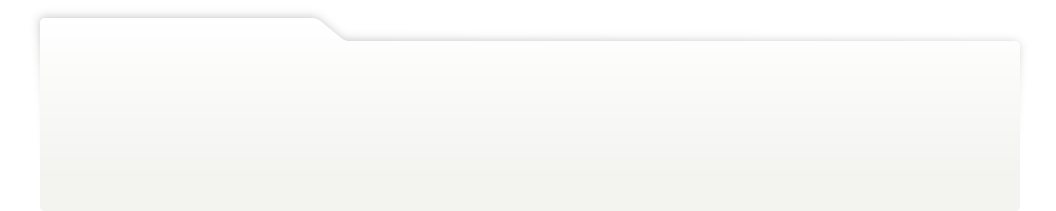
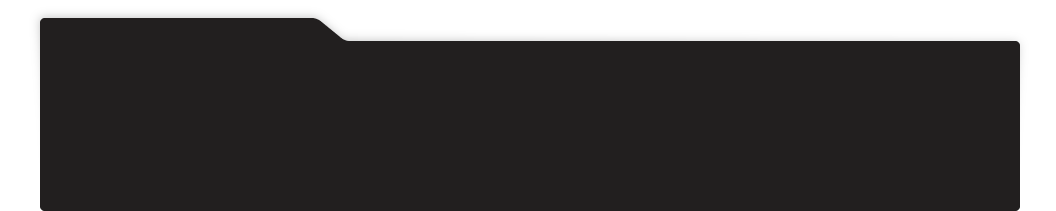
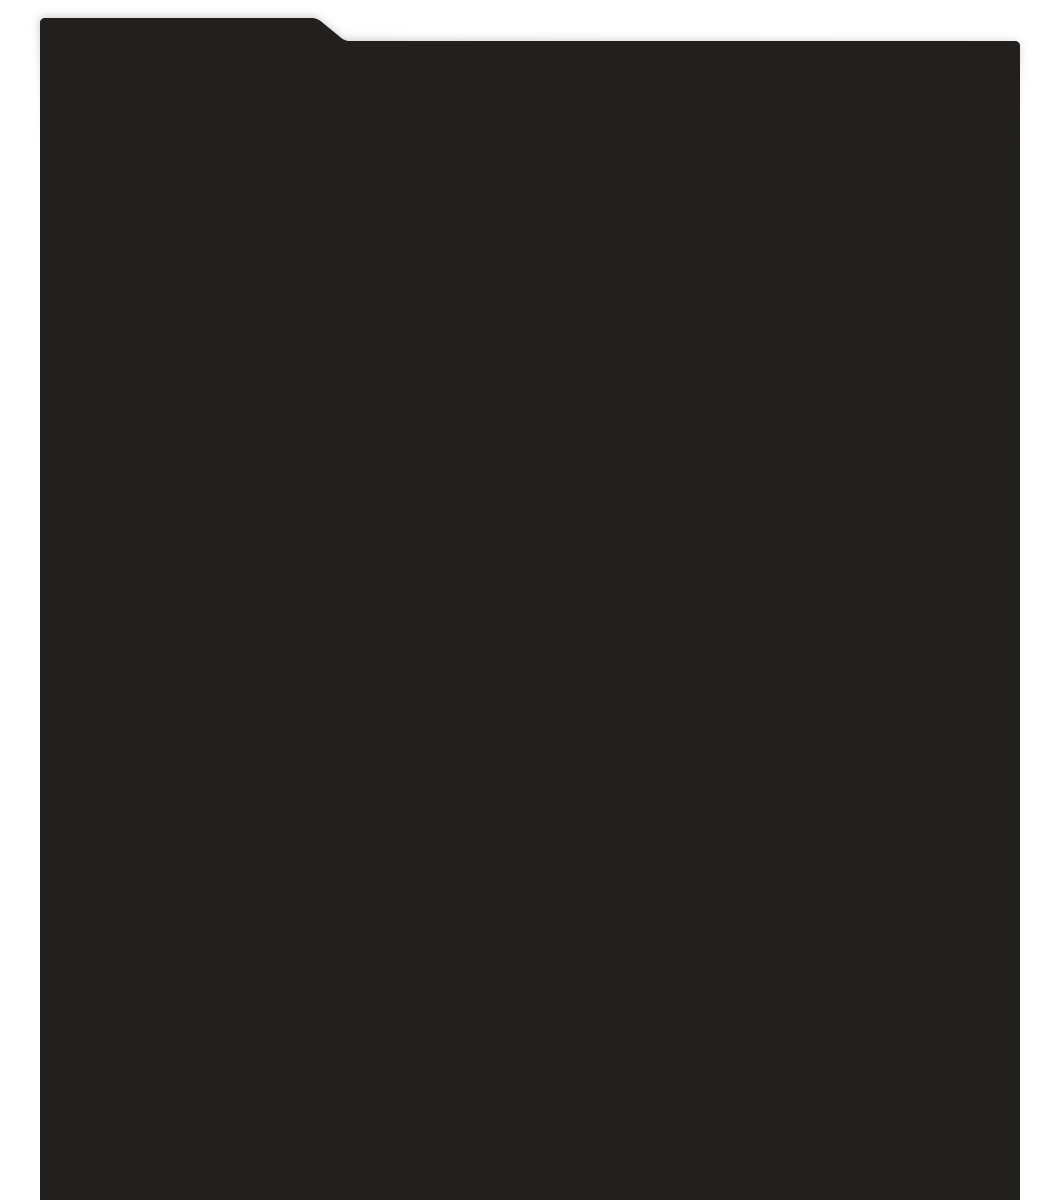
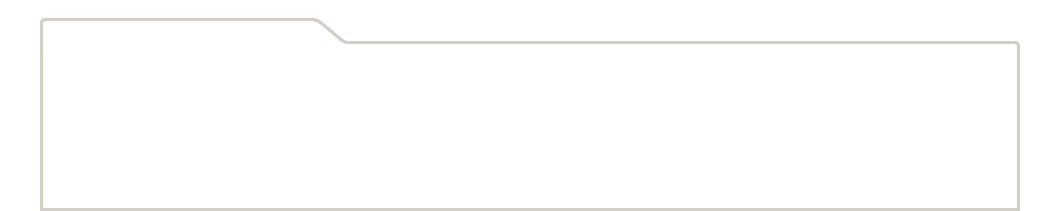
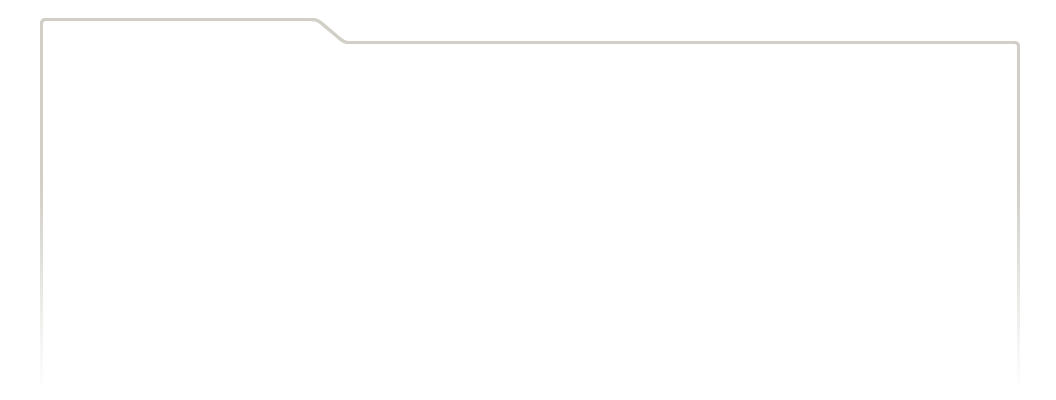
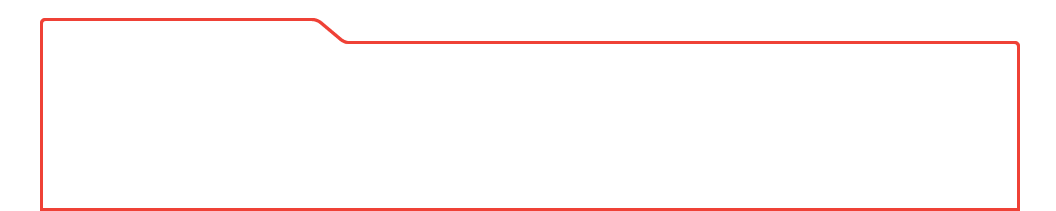
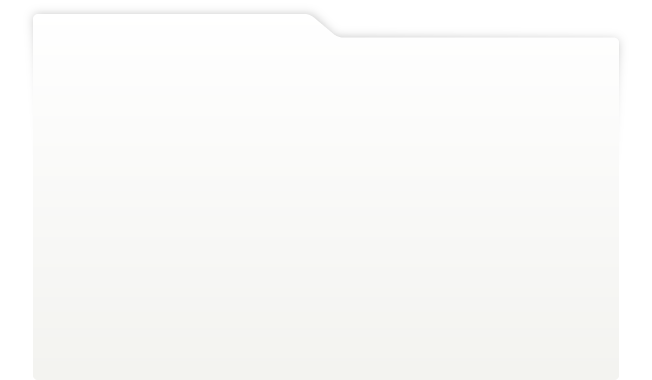
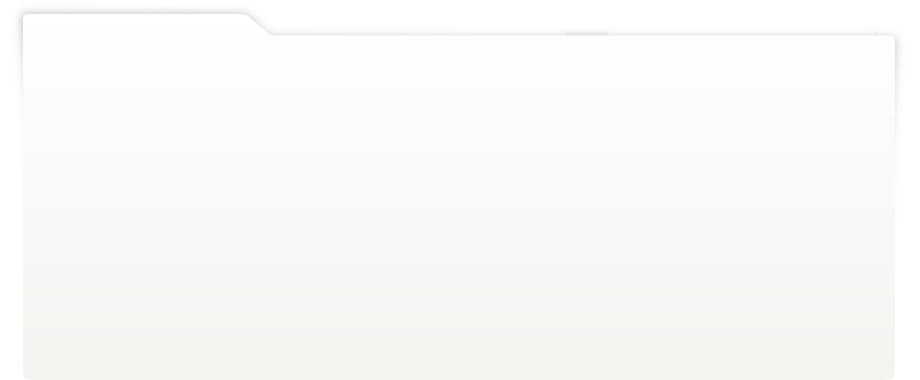
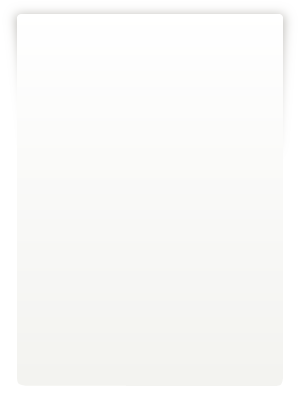
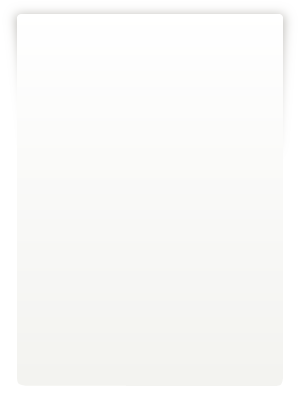
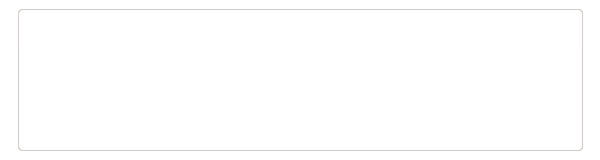
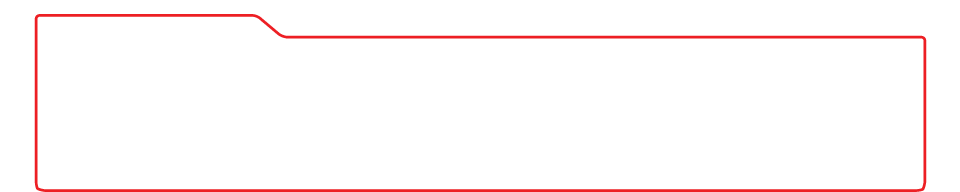
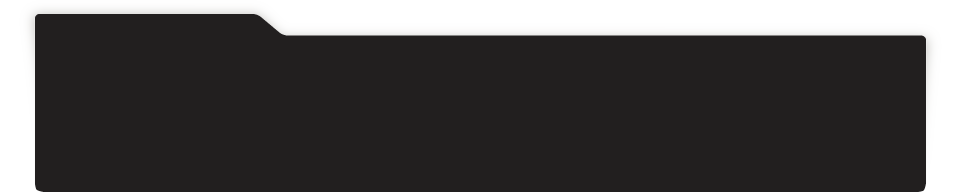
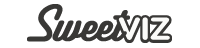
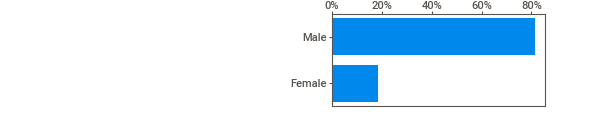
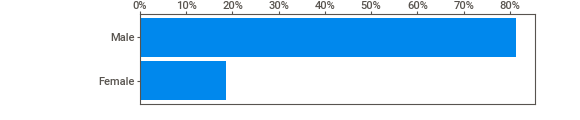
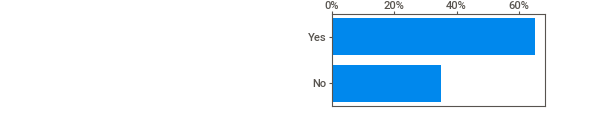
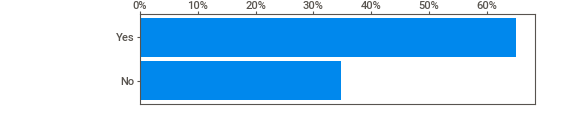
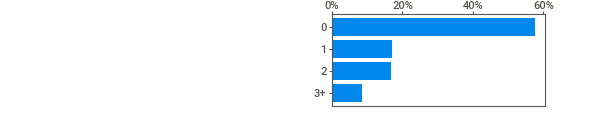
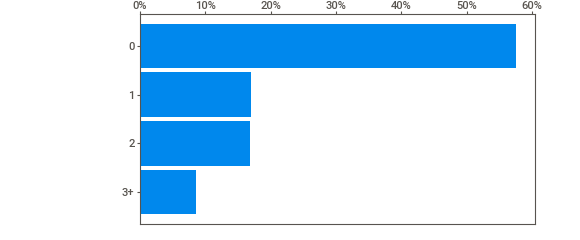
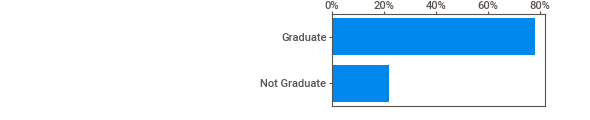
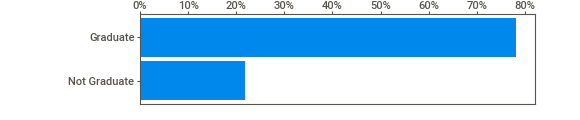
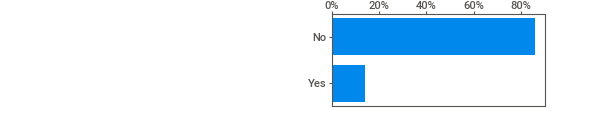
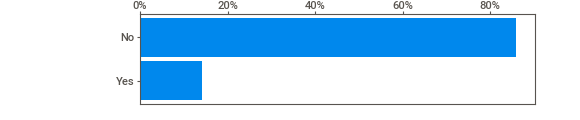
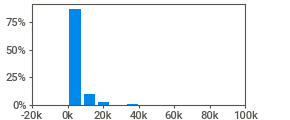
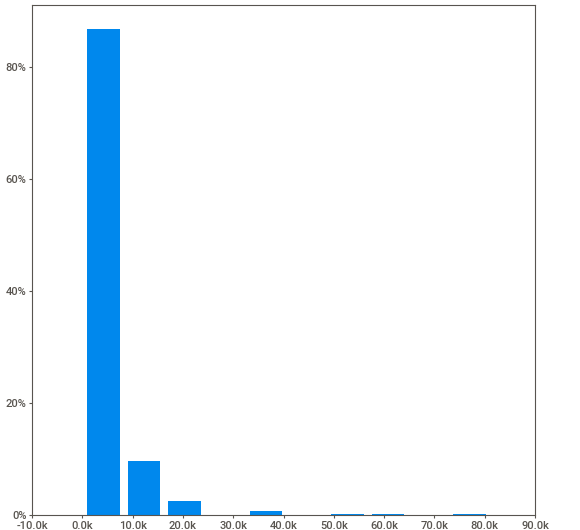
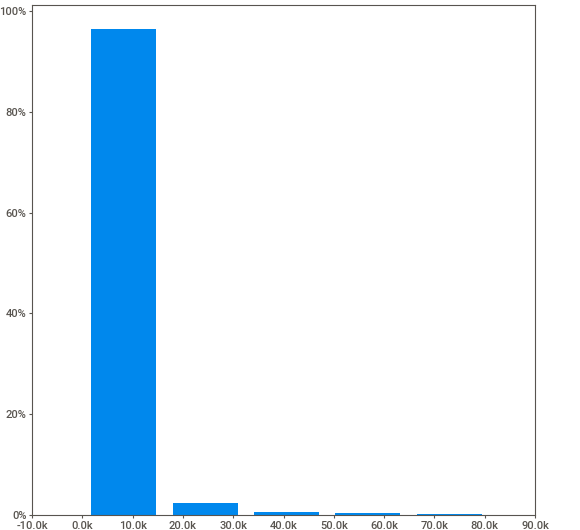
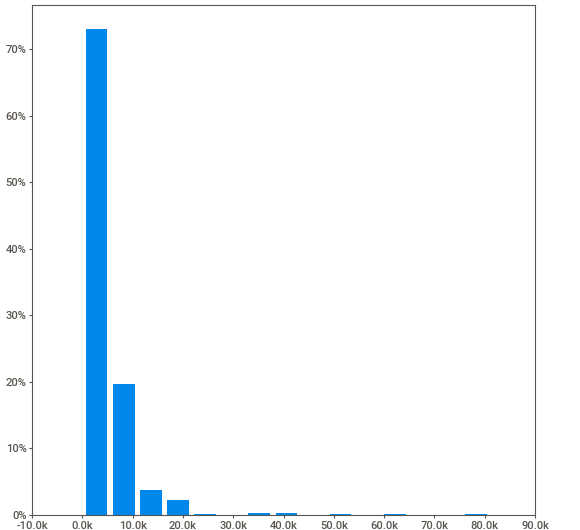
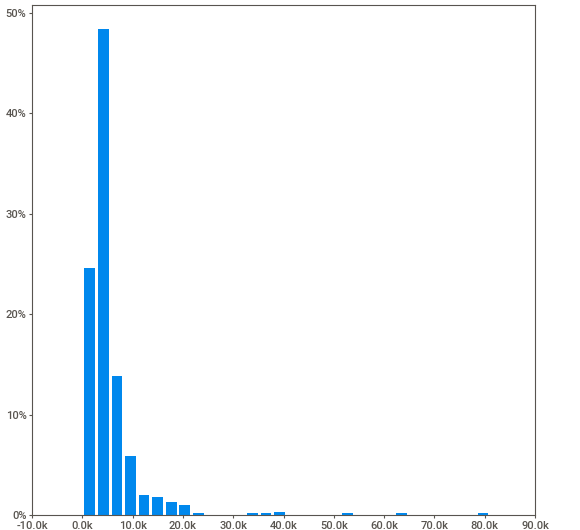
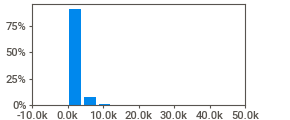
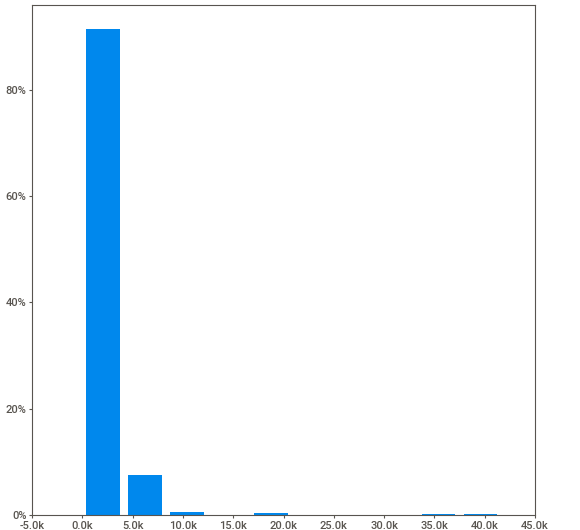
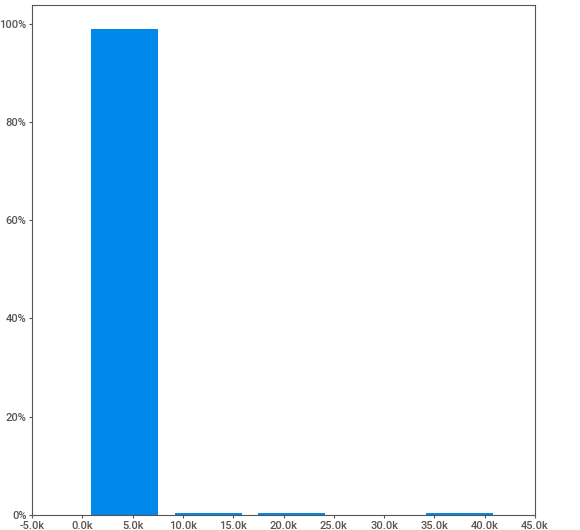
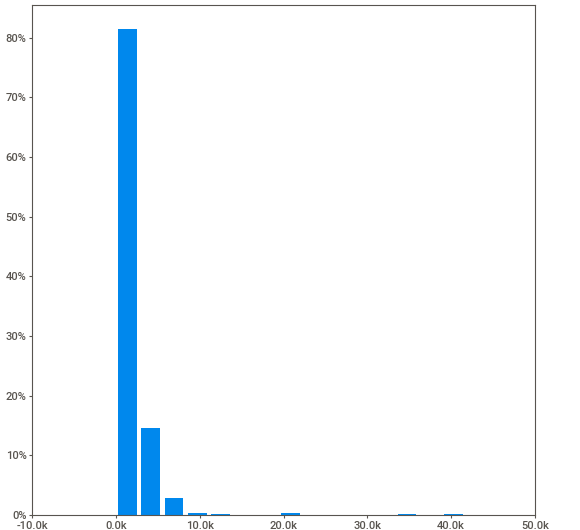
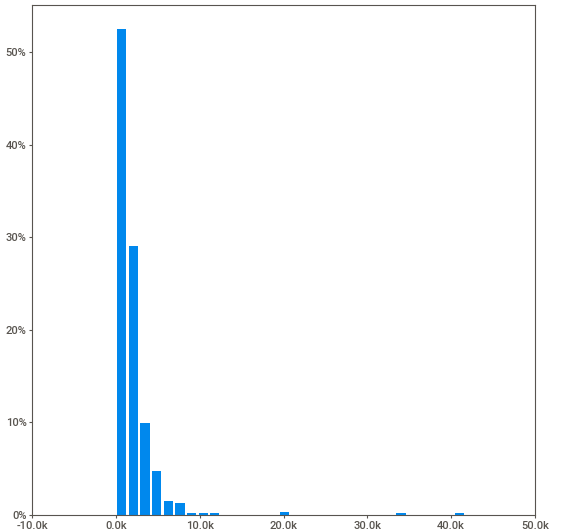
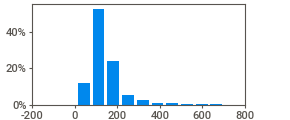
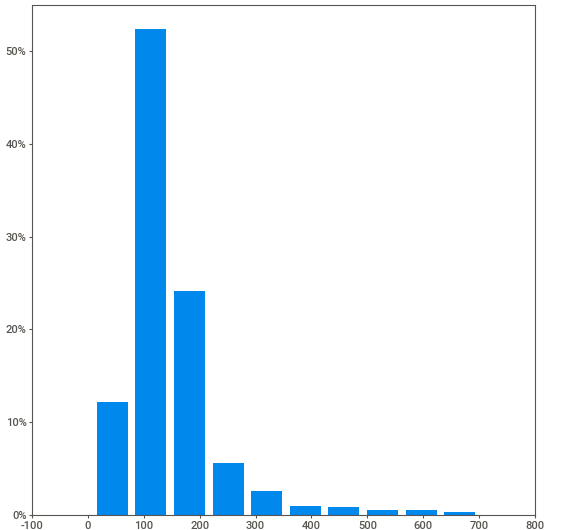
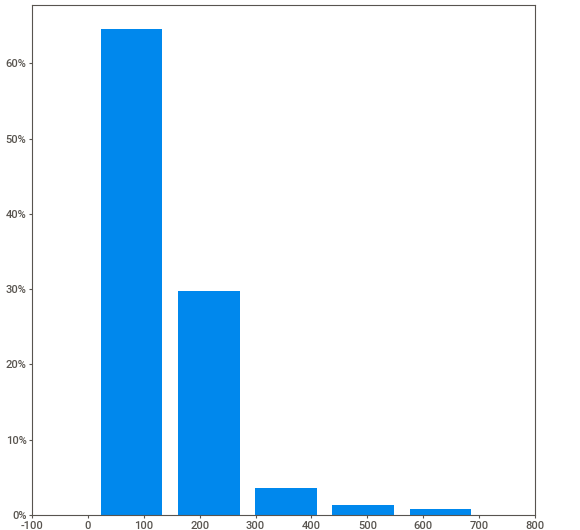
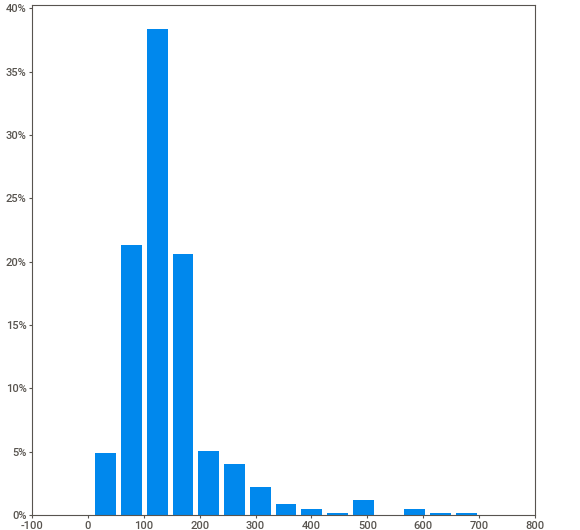
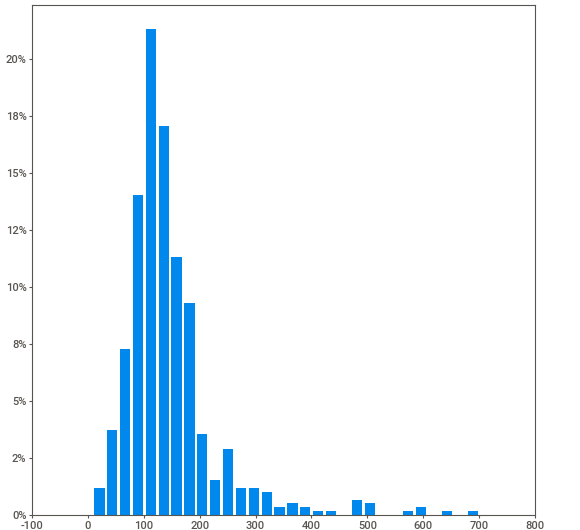
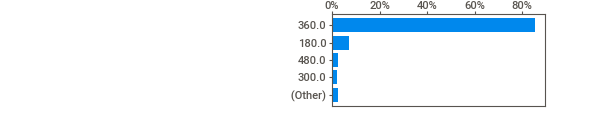
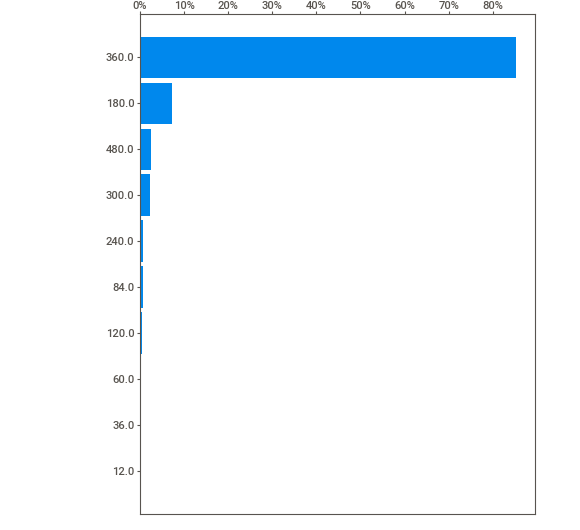
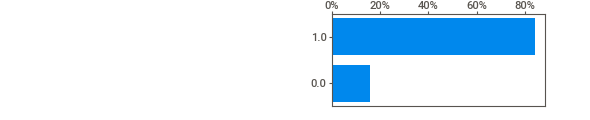
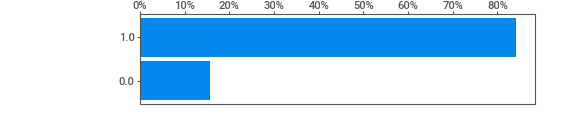
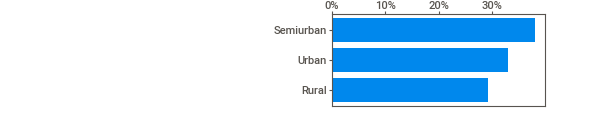
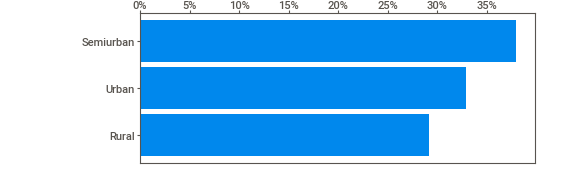
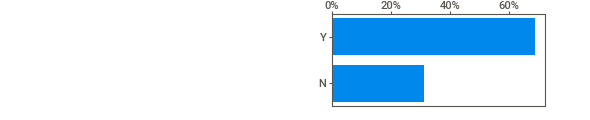
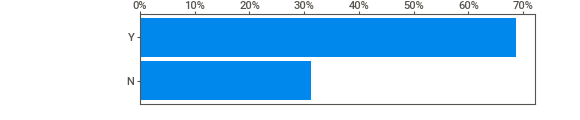
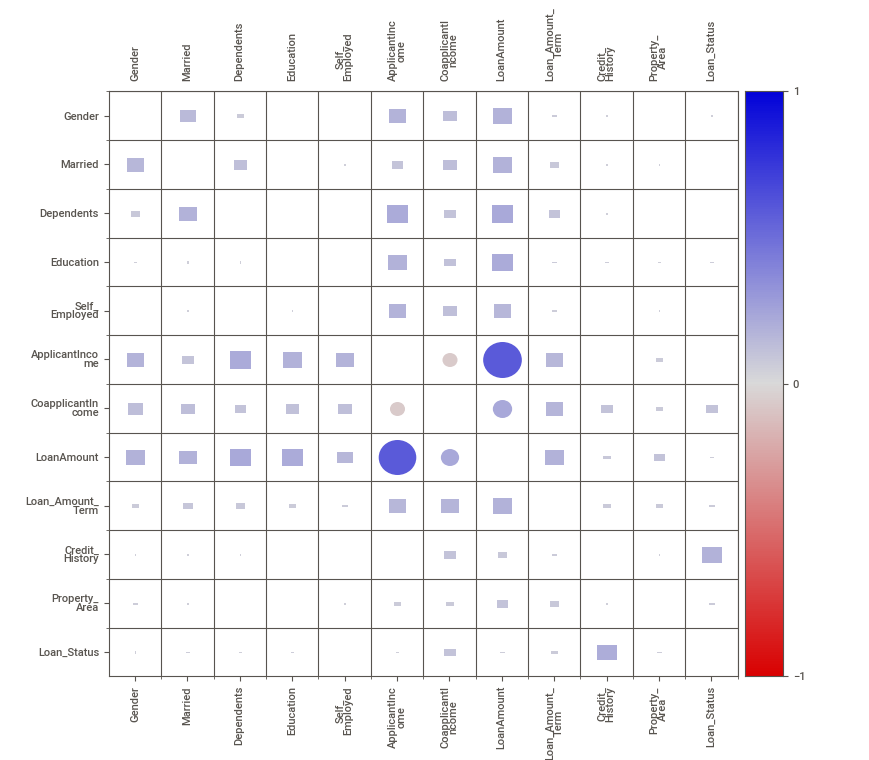
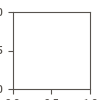

In [ ]:
#Sweetviz
# !pip install sweetviz
import sweetviz
autoEDA = sweetviz.analyze(train)
autoEDA.show_notebook()

In [ ]:
#QUESTION ONE
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


ANSWER: The data set consists of 614 entries indexed 0 to 613.it has float,integers and objects as the data types.

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


ANSWER: The data set consists of 367 entries indexed 0 to 366.It has float,integers and objects as the data types.

In [ ]:
#QUESTION TWO
train.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


ANSWER:There exists missing values i.e.32 in the self employed column,22 in the loan amount column,14 in the loan amount tern column and 50 in the credit history column

In [ ]:
test.isnull().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


ANSWER: There exists missing values in the data set i.e.23 in the self employed column,5 in the loan amount,6 in the loan amount term and 29 in the credit history column.

<ipython-input-51-50aaf2f30d4c>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values, palette='viridis')


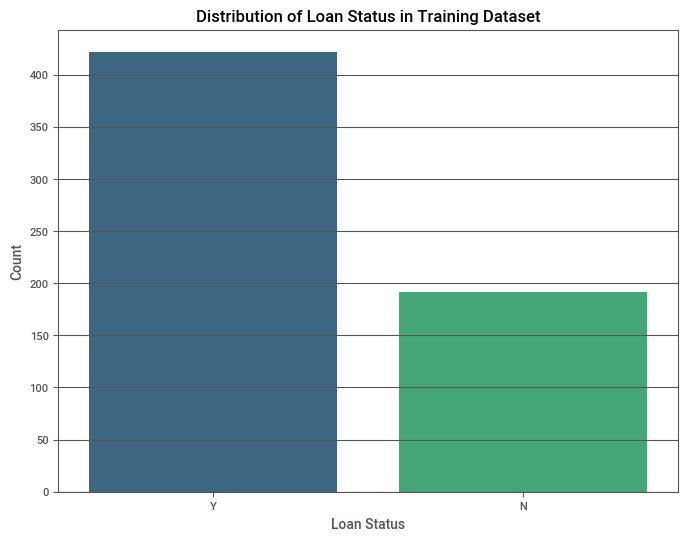

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data Creation (Replace this with loading your actual dataset)
train_data = train

# Count the occurrences of each Loan_Status
loan_status_counts = train_data['Loan_Status'].value_counts()

# Plotting the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values, palette='viridis')
plt.title('Distribution of Loan Status in Training Dataset')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [ ]:
#QUESTION 4
import numpy as np

train['Dependents'].fillna(np.nan, inplace=True)

In [ ]:
import pandas as pd

# Sample Data Creation (Replace this with loading your actual dataset)
train_data = train

# Convert 'Dependents' to numeric values, treating '3+' as 3
train_data['Dependents'] = train_data['Dependents'].fillna(0)
train_data = train_data.dropna(subset=['Dependents'])
train_data['Dependents'] = train_data['Dependents'].replace('3+', 3)

# Convert the Dependents column to integers
train_data['Dependents'] = train_data['Dependents'].astype(int)

# Calculate total number of applicants with dependents
total_with_dependents = train_data[train_data['Dependents'] > 0].shape[0]

# Calculate total number of applicants
total_applicants = train_data.shape[0]

# Print the results
print(f'Total Applicants: {total_applicants}')
print(f'Total Applicants with Dependents: {total_with_dependents}')

Total Applicants: 614
Total Applicants with Dependents: 254


ANSWER:  There are 254 loan applicants that have dependents based on the historical dataset.

In [ ]:
train['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [ ]:
# Convert categorical columns to numerical
train['Gender']=train['Gender'].map({'Male':1})
train['Married']=train['Married'].map({'No':0,'Yes':1})
train['Education']=train['Education'].map({'Not Graduate':0,'Graduate':1})
train['Self_Employed']=train['Self_Employed'].map({'No':0,'Yes':1})
train['Property_Area']=train['Property_Area'].map({'Rural':0,'Urban':1})
train['Property_Area']=train['Property_Area'].map({'Rural':0,'Urban':1})
train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,NaN,Y,5849
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,NaN,N,4583
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,NaN,Y,3000
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,NaN,Y,2583
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,NaN,Y,6000


In [ ]:
X = train.drop(['Loan_ID', 'Loan_Status'], axis=1)
y= train['Loan_Status']

In [ ]:
!pip install pandas
import pandas as pd
# Assuming 'train' is your DataFrame containing all data
# Split data into training and testing sets using train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    train.drop(['Loan_ID', 'Loan_Status'], axis=1),  # Features
    train['Loan_Status'],  # Target variable
    test_size=0.2,  # Proportion of data for testing (e.g., 20%)
    random_state=42  # Set random seed for reproducibility
)


# Now apply pd.to_numeric to X_train
X_train = X_train.apply(pd.to_numeric, errors='coerce')

In [ ]:
X= X_train.fillna(0)

In [ ]:
!pip install pandas
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'train' is your DataFrame containing all data
# Split data into training and testing sets using train_test_split from sklearn

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    train.drop(['Loan_ID', 'Loan_Status'], axis=1),  # Features
    train['Loan_Status'],  # Target variable
    test_size=0.2,  # Proportion of data for testing (e.g., 20%)
    random_state=42  # Set random seed for reproducibility
)

# Now apply pd.to_numeric to X_train and X_test
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Fill NaN values in both X_train and X_test
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'train' is your DataFrame containing all data
# Split data into training and testing sets using train_test_split from sklearn

# Convert 'Loan_Status' to numerical (0 and 1) before splitting
train['Loan_Status'] = train['Loan_Status'].map({'Y': 1, 'N': 0})  # Assuming 'Y' and 'N' are your values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    train.drop(['Loan_ID', 'Loan_Status'], axis=1),  # Features
    train['Loan_Status'],  # Target variable
    test_size=0.2,  # Proportion of data for testing (e.g., 20%)
    random_state=42  # Set random seed for reproducibility
)

# Now apply pd.to_numeric to X_train and X_test
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Fill NaN values in both X_train and X_test
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6872 - loss: 55.2160  
Test Loss: 64.97874450683594
Test Accuracy: 0.6504064798355103


In [ ]:
# Preprocess the test data
# Fill missing values
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].median())
test['Self_Employed'] = test['Self_Employed'].fillna('No')
test['Credit_History'] = test['Credit_History'].fillna(0)

In [ ]:
# Convert categorical columns to numerical
test['Gender']=test['Gender'].map({'Male':1})
test['Married']=test['Married'].map({'No':0,'Yes':1})
test['Education']=test['Education'].map({'Not Graduate':0,'Graduate':1})
test['Self_Employed']=test['Self_Employed'].map({'No':0,'Yes':1})
test['Property_Area']=test['Property_Area'].map({'Rural':0,'Urban':1})

In [ ]:
# Prepare test features
X_test_final = test.drop(['Loan_ID'], axis=1)
X_test_final = X_test_final.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric
X_test_final = X_test_final.fillna(0)  # Fill any remaining NaN values with 0

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'X_train' and 'X_test_final' are your DataFrames

# Get the columns used during fitting
training_columns = X_train.columns

# Ensure X_test_final has the same columns as X_train
X_test_final = X_test_final.reindex(columns=training_columns, fill_value=0)

# Create a scaler instance
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_final = scaler.transform(X_test_final)

In [ ]:
# Make predictions
predictions = model.predict(X_test_final)
predictions = (predictions > 0.5).astype(int)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:

# Add predictions to the test data
test['Loan_Status_Prediction'] = predictions

In [ ]:
import pandas as pd

# Assuming predictions is a numpy array or list
predictions = model.predict(X_test_final)

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(predictions, columns=['Predicted'])

# Save to CSV
predictions_df.to_csv('predictions.csv', index=False)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
# Display the first few values
print(predictions_df.head())

   Predicted
0   0.528692
1   0.513224
2   0.550010
3   0.619662
4   0.552209


In [ ]:
# Count the predictions
prediction_counts = test['Loan_Status_Prediction'].value_counts()

# Get the number of rejected loans
rejected_loans = prediction_counts.get(0, 0)  # Default to 0 if not found
print(f'Number of loans rejected: {rejected_loans}')

Number of loans rejected: 21


In [ ]:
# Map the Education column to Graduate (1) and Non-Graduate (0)
test['Education_Status'] = test['Education'].map({0: 'Not Graduate', 1: 'Graduate'})

# Count the number of graduates with approved loan status
num_graduates_approved = ((test['Education_Status'] == 'Graduate') & (test['Loan_Status_Prediction'] == 1)).sum()

print(f'Number of graduates with approved loan status: {num_graduates_approved}')

Number of graduates with approved loan status: 275


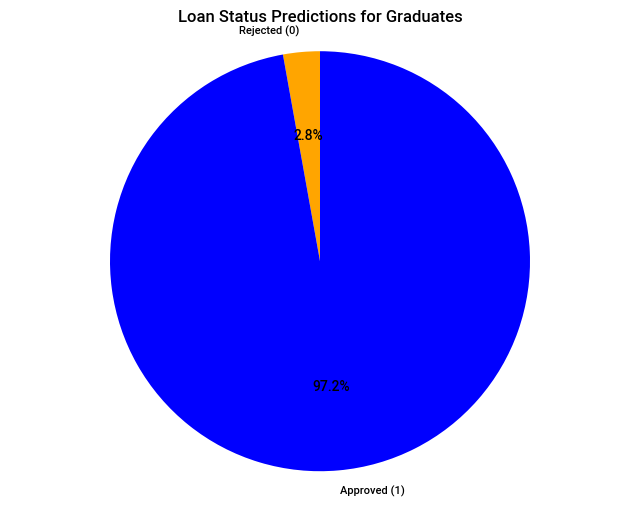

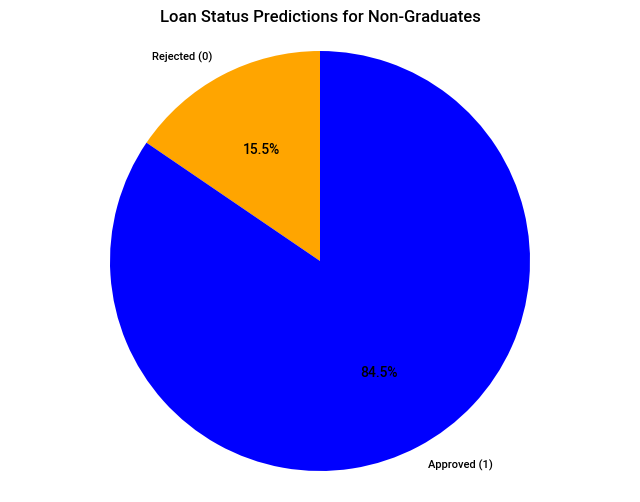

In [ ]:
import matplotlib.pyplot as plt
# Map the Education column to Graduate (1) and Non-Graduate (0)
test['Education_Status'] = test['Education'].map({0: 'Not Graduate', 1: 'Graduate'})

# Count loan status for each education status
loan_status_by_education = test.groupby(['Education_Status', 'Loan_Status_Prediction']).size().unstack(fill_value=0)

# Create a pie chart for graduates
plt.figure(figsize=(8, 6))
plt.pie(loan_status_by_education.loc['Graduate'],
        labels=['Rejected (0)', 'Approved (1)'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['orange', 'blue'])
plt.title('Loan Status Predictions for Graduates')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Create a pie chart for non-graduates
plt.figure(figsize=(8, 6))
plt.pie(loan_status_by_education.loc['Not Graduate'],
        labels=['Rejected (0)', 'Approved (1)'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['orange', 'blue'])
plt.title('Loan Status Predictions for Non-Graduates')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

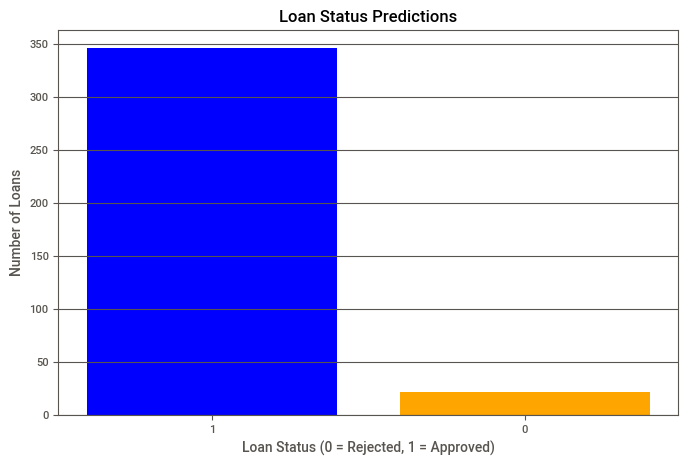

In [ ]:
# Count the predictions
prediction_counts = test['Loan_Status_Prediction'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(prediction_counts.index.astype(str), prediction_counts.values, color=['blue', 'orange'])
plt.title('Loan Status Predictions')
plt.xlabel('Loan Status (0 = Rejected, 1 = Approved)')
plt.ylabel('Number of Loans')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.show()

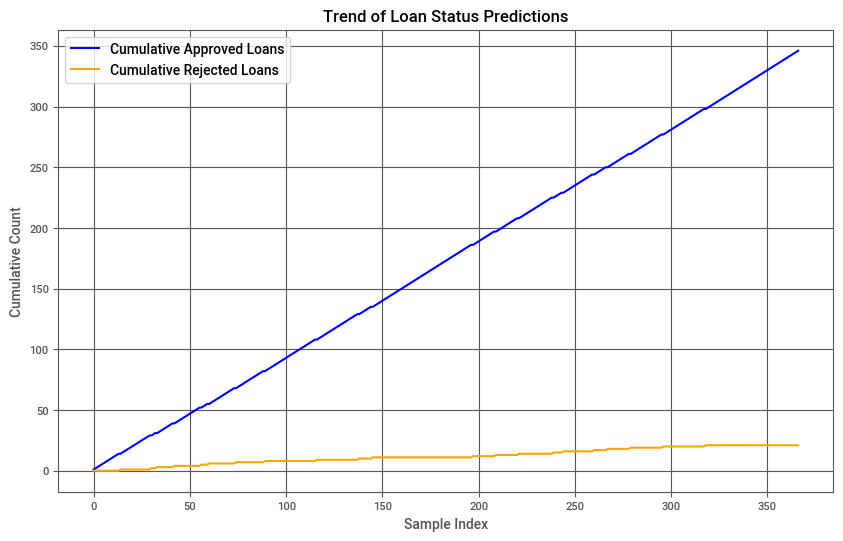

In [ ]:
# Create cumulative sums for approved (1) and rejected (0)
cumulative_approved = (test['Loan_Status_Prediction'] == 1).cumsum()
cumulative_rejected = (test['Loan_Status_Prediction'] == 0).cumsum()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(cumulative_approved, label='Cumulative Approved Loans', color='blue')
plt.plot(cumulative_rejected, label='Cumulative Rejected Loans', color='orange')

# Add titles and labels
plt.title('Trend of Loan Status Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Cumulative Count')
plt.legend()
plt.grid()
plt.show()

We calculate cumulative counts of approved and rejected loans using boolean indexing and the cumsum() function. The trend lines are plotted for both approved and rejected loans, allowing you to see how the predictions accumulate across the dataset

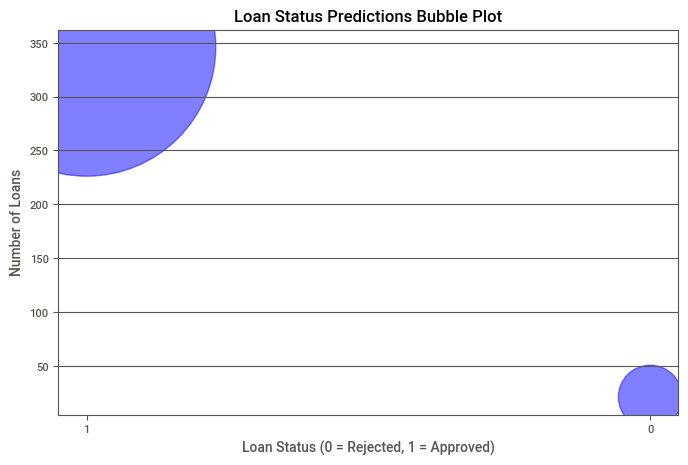

In [ ]:
# Count the predictions
prediction_counts = test['Loan_Status_Prediction'].value_counts()

# Prepare data for the bubble plot
statuses = prediction_counts.index.astype(str)
counts = prediction_counts.values

# Define sizes for the bubbles
sizes = counts * 100  # Scale the sizes for better visibility

# Create a bubble plot
plt.figure(figsize=(8, 5))
plt.scatter(statuses, counts, s=sizes, alpha=0.5, color='blue')

# Add titles and labels
plt.title('Loan Status Predictions Bubble Plot')
plt.xlabel('Loan Status (0 = Rejected, 1 = Approved)')
plt.ylabel('Number of Loans')
plt.grid(axis='y')

# Show the plot
plt.show()

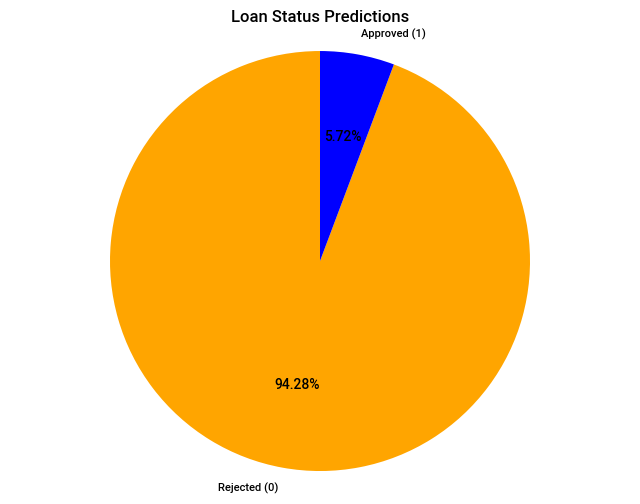

In [ ]:
# Count the predictions
prediction_counts = test['Loan_Status_Prediction'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(prediction_counts, labels=['Rejected (0)', 'Approved (1)'], autopct='%1.2f%%', startangle=90, colors=['orange', 'blue'])
plt.title('Loan Status Predictions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

The number of rejected loans is higher than the number of approved loans